<h2><center>AI in Healthcare</center></h2>
<h3><center>Smart Home Activities Prediction</h3>

The objective of this lab is to learn to apply the LSTM to the data collectd from Halmstad University's Smart Home

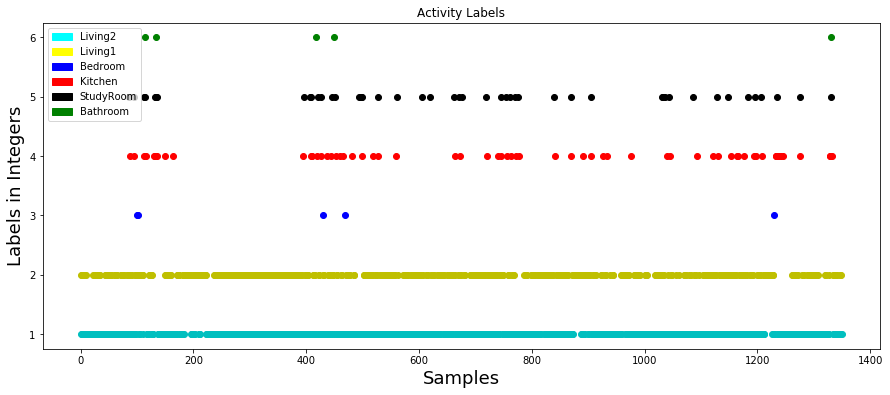

In [4]:
from mat4py import loadmat
import numpy as np
from numpy import array
from pandas import DataFrame, concat
import os

data = loadmat(f"{os.getcwd()}\\Data.mat")

DatesVectors = np.array(data['DatesVectors'])
SensorsVals = np.array(data['SensorsVals'])
Labels = np.array(data['Labels'])
Labels = Labels[7401:,:]

SensorsVals = SensorsVals.astype('int')
SensorsVals = SensorsVals[7401:,:]
SensorsVals = np.concatenate(SensorsVals,axis=0)

TrainLabels=Labels
TrainLabels=np.ravel(TrainLabels)
TrainLabels=np.array(TrainLabels)

Classes=['Living2','Living1','Bedroom','Kitchen','Study','Bathroom']
Indexes=[] # creat an empty list
for kk in range(len(Classes)):
    lbl=Classes[kk]
    idx=np.argwhere(TrainLabels==lbl)
    Indexes.append(idx)
    
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
Colors=['c','y','b','r','k','g']
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
plt.title('Activity Labels')
for kk in range(len(Indexes)):
    idx=np.array(Indexes[kk])
    for jj in range(len(idx)):
        ax.plot(idx[jj],SensorsVals[idx[jj]],'o',color=Colors[kk],label=Classes[kk])
        
ax.set_ylabel('Labels in Integers',fontsize=18)
ax.set_xlabel('Samples',fontsize=18)

blue_patch = mpatches.Patch(color='blue', label='Bedroom')
red_patch = mpatches.Patch(color='red', label='Kitchen')
green_patch = mpatches.Patch(color='green', label='Bathroom')
cyan_patch = mpatches.Patch(color='cyan', label='Living2')
yellow_patch = mpatches.Patch(color='yellow', label='Living1')
black_patch = mpatches.Patch(color='black', label='StudyRoom')


ax.legend(handles=[cyan_patch,yellow_patch,blue_patch,red_patch,black_patch,green_patch])
plt.show()


In [3]:
# you are supposed to do a sequence of integers prediction using LSTM.
# First, try to visualize what you have in the SensorsVals. The values of SensorsVals are already concatanated into an array 
# of integers.

# You expose the LSTM to a sequence of observation. Then, the LSTM is going to do the prediciton of the sequence after some
# training (sequence to sequence model).

# You may try your own methodology. The suggestion is to:
# - one hot encode the SensorsVals varialbles (encoded)
# - Frame the encoded sequences for learning 


